In [2]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

^C
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/15.9 MB 3.4 MB/s eta 0:00:05
   - -------------------------------------- 0.8/15.9 MB 1.9 MB/s eta 0:00:09
   --- ------------------------------------ 1.3/15.9 MB 2.2 MB/s eta 0:00:07
   --- ------------------------------------ 1.6/15.9 MB 2.2 MB/s eta 0:00:07
   ---- ----------------------------------- 1.8/15.9 MB 1.7 MB/s eta 0:00:09
   ---- ----------------------------------- 1.8/15.9 MB 1.7 MB/s eta 0:00:09
   ---- ----------------------------------- 1.8/15.9 MB 1.7 MB/s eta 0:00:09
   ----- ---------------------------------- 2.1/15.9 MB 1.2 MB/s eta 0:00:12
   ----- ---------------------------------- 2.1/15.9 MB 1.2 MB/s eta 0:00:12
   ----- ---------------------------------- 2.4/15.9 MB 1.0 MB/s eta 0:00:14
   ----- ---------------------------------- 2.4/15.9 MB 1.0 MB/s eta 0:00:14
   ------ ----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as split, GridSearchCV

Matplotlib is building the font cache; this may take a moment.


In [2]:
data = pd.read_csv(r'C:\Users\Shagufta Anjum\Desktop\Projects\MaternalHealthRisk\Maternal Health Risk Data Set.csv')

In [3]:
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [4]:
#To display the first few rows of a dataframe.
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [5]:
#To display last few rows of a dataframe.
data.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [6]:
#To dislplay summary of dataframe that includes,columns ,datatypes,non-null count and memory usage for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [7]:
#To retrive the dimensions of the dataframe.
data.shape

(1014, 7)

In [8]:
#To check null/Missing values
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [9]:
#To check if we have Duplicate values present in our dataset       
data.duplicated().sum()

np.int64(562)

In [10]:
#To provide staistical summary of dataframe such as count ,mean,min,max and more
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [11]:
#To count the number of distinct values present in each column
unique_value_counts = data.nunique()

unique_value_counts

Age            50
SystolicBP     19
DiastolicBP    16
BS             29
BodyTemp        8
HeartRate      16
RiskLevel       3
dtype: int64

C:\Users\Shagufta Anjum\AppData\Local\Temp\ipykernel_4832\2177603106.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count = sns.countplot(x="RiskLevel", data=data,order=risk_order, palette=p_colors)


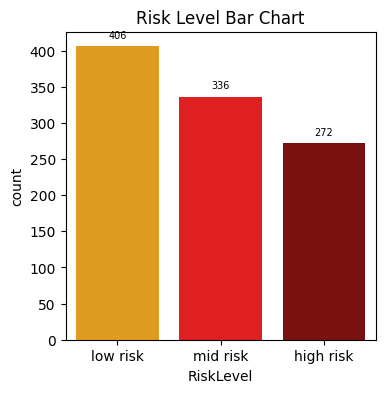

In [12]:
#bar chart for categorical feature

#defineing custom colors for bar chart bars
p_colors = ['orange', 'red', 'darkred']
#order in which risk level should be displayed
risk_order = ["low risk", "mid risk", "high risk"]
#creating fig with specific size
plt.figure(figsize=(4, 4))
#setting title
plt.title('Risk Level Bar Chart')
#creating bar plot for risklevel column from dataset with the colors you want
count = sns.countplot(x="RiskLevel", data=data,order=risk_order, palette=p_colors)
#creating lables for each bar with height of bar
for bar in count.patches:
    count.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='center', size=7, xytext=(0, 8), textcoords='offset points')
#show the bar chart
plt.show()

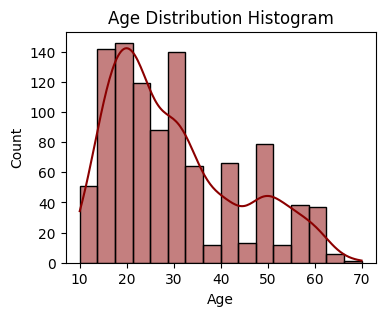

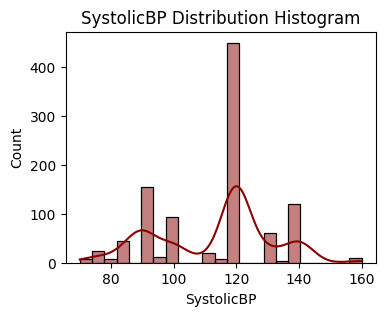

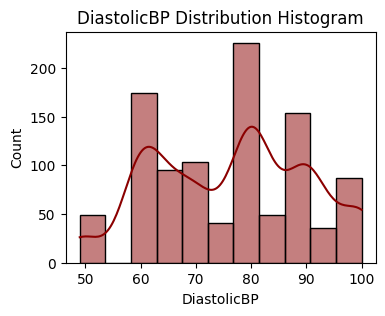

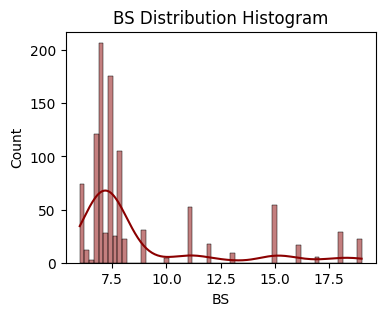

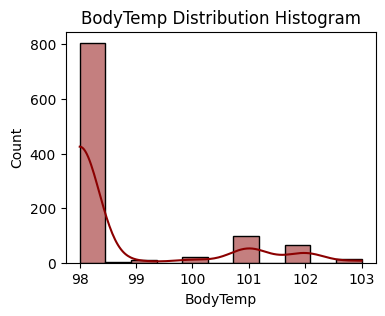

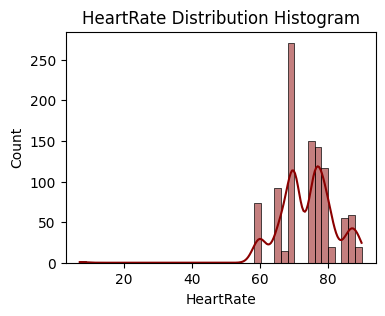

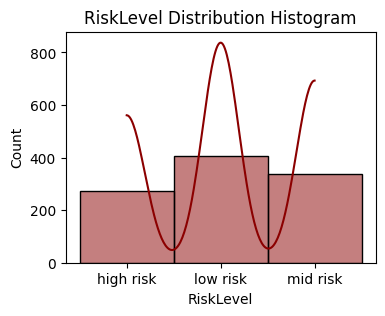

In [13]:
#Histogram for numerical features

#iterate through each coloumn in dataset
for column in data.columns:
    #create new figure for each column
    plt.figure(figsize=(4,3))
    #create histogram plot
    sns.histplot(data=data[column], kde=True, color='darkred')
    #setting the title
    plt.title(f'{column} Distribution Histogram')
    #set x-axis label to column name
    plt.xlabel(column)
    #display the histogram 
    plt.show()

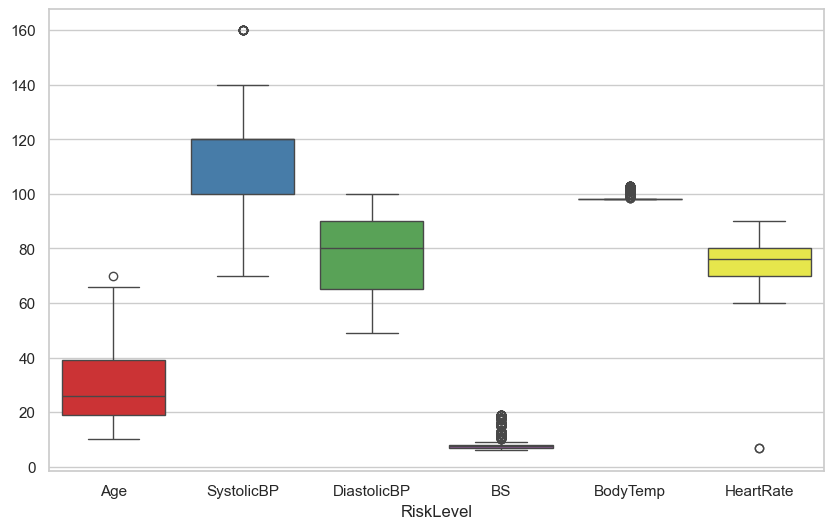

In [14]:
#To dectect outliers we use box plot 

#setting figsize
plt.figure(figsize=(10, 6))
#set style of plot
sns.set(style="whitegrid")
#create box plot for entire dataset with color
sns.boxplot(data=data, palette="Set1")  # Use your dataset and color palette
#set x-axis name
plt.xlabel(column)
plt.show()

C:\Users\Shagufta Anjum\AppData\Local\Temp\ipykernel_4832\3399720594.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['BS'], palette="Set1")
C:\Users\Shagufta Anjum\AppData\Local\Temp\ipykernel_4832\3399720594.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['BodyTemp'], palette="Set1")


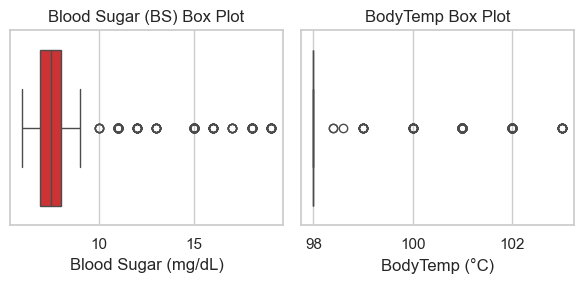

In [15]:
#Creating box plots for BS and BodyTemp
#create fig with size
plt.figure(figsize=(6, 3))
#set style of plot
sns.set(style="whitegrid")
#create sublpot
plt.subplot(121)
#create box plot for BS
sns.boxplot(x=data['BS'], palette="Set1")
plt.title("Blood Sugar (BS) Box Plot")
plt.xlabel("Blood Sugar (mg/dL)")
#create box plot for BodyTemp
plt.subplot(122)
sns.boxplot(x=data['BodyTemp'], palette="Set1")
plt.title("BodyTemp Box Plot")
plt.xlabel("BodyTemp (°C)")
#adjust layout of plots
plt.tight_layout()
plt.show()

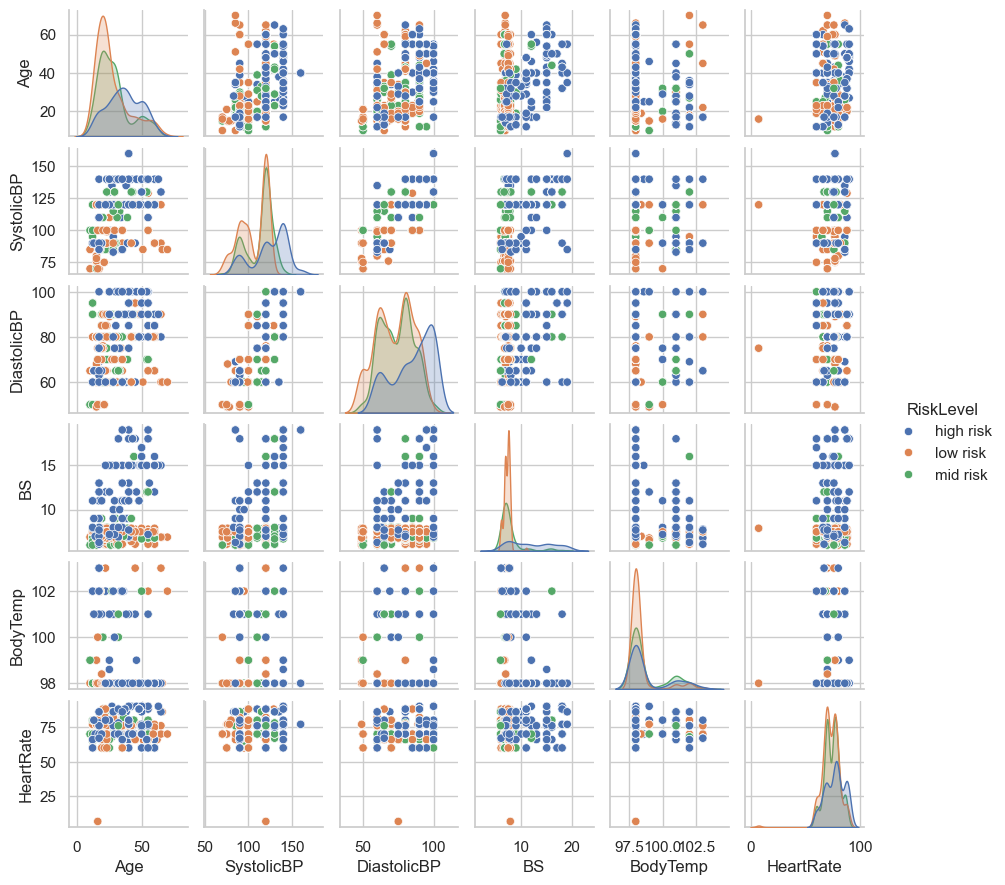

In [17]:
#Pairplot visualization with risklevel as hue
sns.pairplot(data,height=1.5 ,hue='RiskLevel')

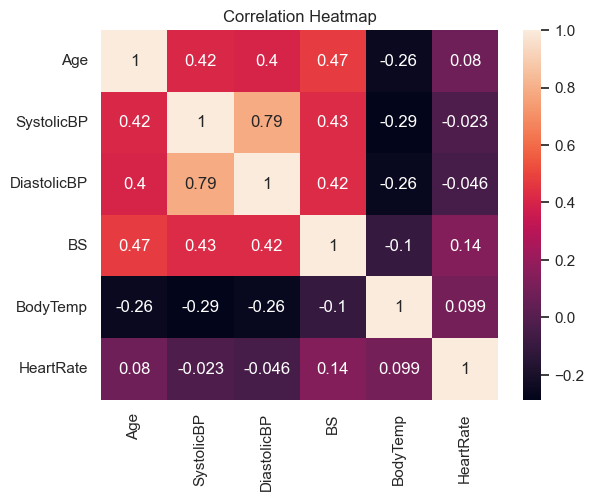

In [18]:
#To determine correlation between features
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()

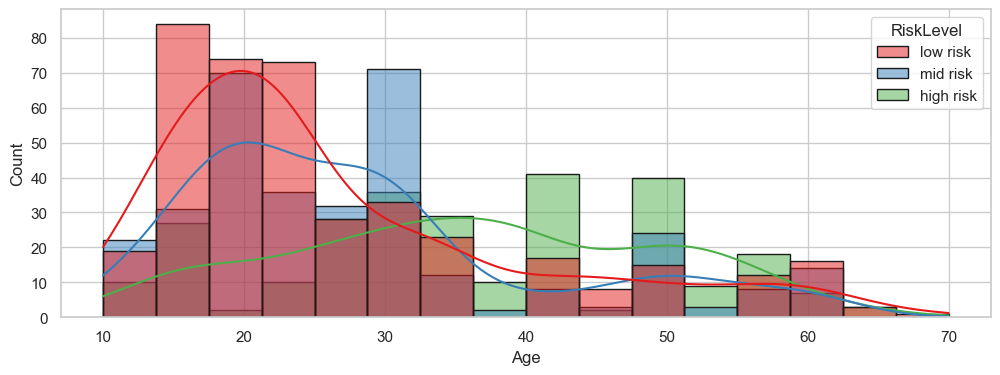

In [19]:
# Set the background color of the figure to white
plt.figure(figsize=(12,4), facecolor='white')
# Create the histogram plot with black borders
sns.histplot(data=data, x="Age", hue="RiskLevel", kde=True, hue_order=risk_order, palette='Set1', edgecolor='k')
# Show the plot
plt.show()

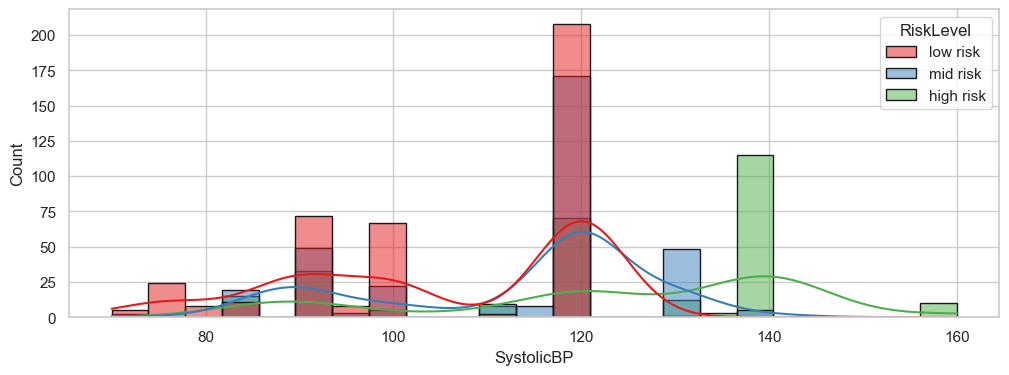

In [20]:
# Set the background color of the figure to white
plt.figure(figsize=(12,4), facecolor='white')
# Create the histogram plot with black borders
sns.histplot(data=data, x="SystolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette='Set1', edgecolor='k')
# Show the plot

plt.show()

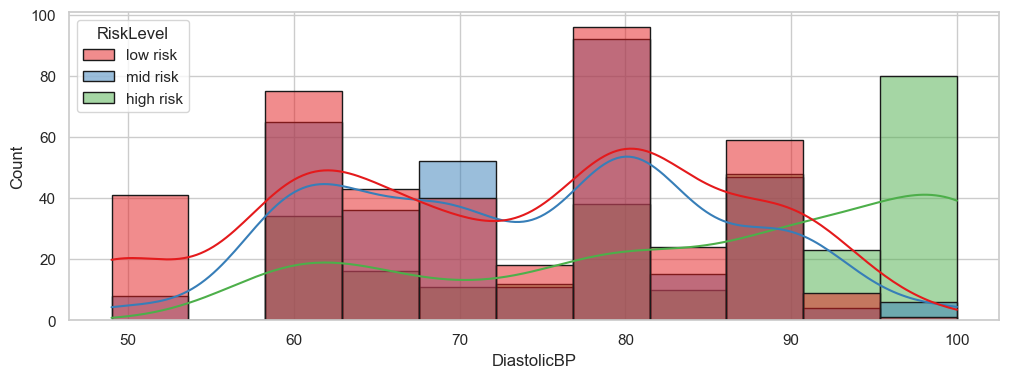

In [21]:
# Set the background color of the figure to white
plt.figure(figsize=(12,4), facecolor='white')
# Create the histogram plot with black borders
sns.histplot(data=data, x="DiastolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette='Set1', edgecolor='k')
# Show the plot

plt.show()

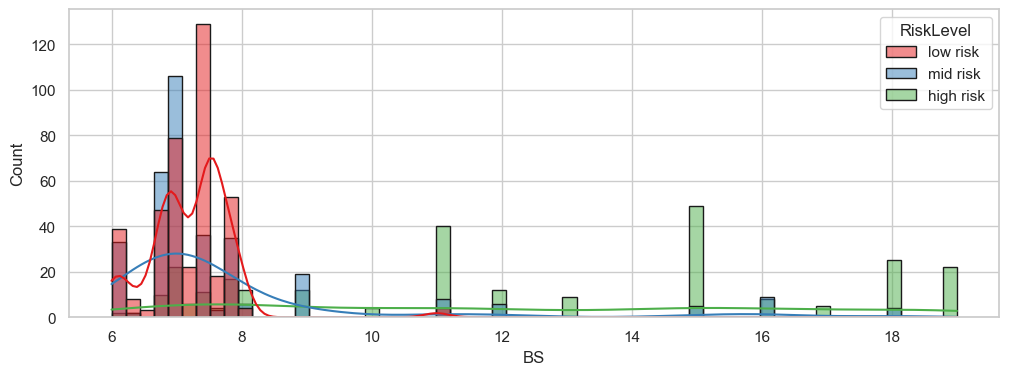

In [22]:
# Set the background color of the figure to white
plt.figure(figsize=(12,4), facecolor='white')
# Create the histogram plot with black borders
sns.histplot(data=data, x="BS", hue="RiskLevel", kde=True, hue_order=risk_order, palette='Set1', edgecolor='k')
# Show the plot

plt.show()

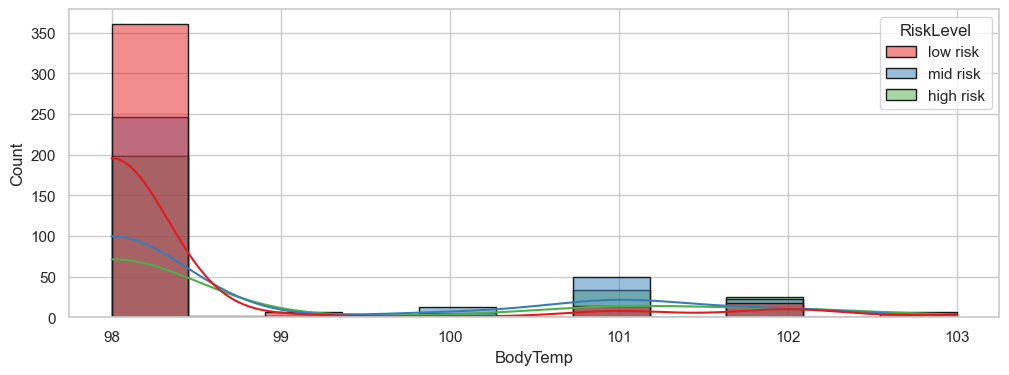

In [23]:
# Set the background color of the figure to white
plt.figure(figsize=(12,4), facecolor='white')
# Create the histogram plot with black borders
sns.histplot(data=data, x="BodyTemp", hue="RiskLevel", kde=True, hue_order=risk_order, palette='Set1', edgecolor='k')
# Show the plot

plt.show()

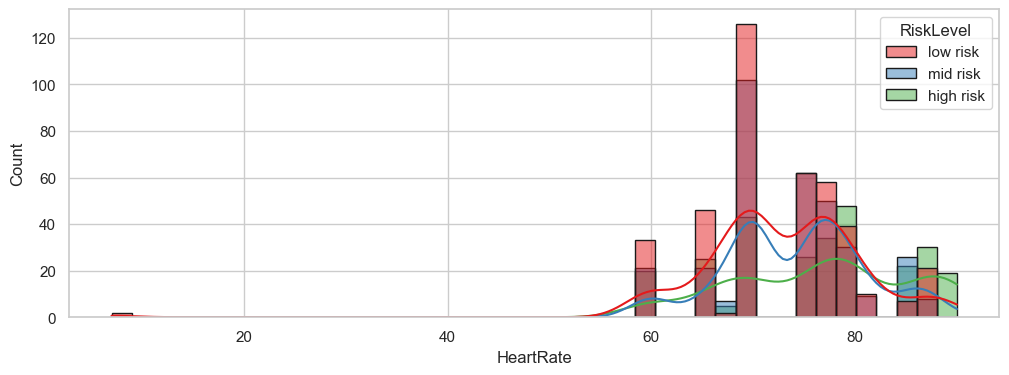

In [24]:
# Set the background color of the figure to white
plt.figure(figsize=(12,4), facecolor='white')
# Create the histogram plot with black borders
sns.histplot(data=data, x="HeartRate", hue="RiskLevel", kde=True, hue_order=risk_order, palette='Set1', edgecolor='k')
# Show the plot

plt.show()

In [25]:
#To convert categorical data, which consists of text or string values, into numerical values. 
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder 
label_encoder = LabelEncoder()

# Fit and transform the 'RiskLevel' column in-place
data['RiskLevel'] = label_encoder.fit_transform(data['RiskLevel'])

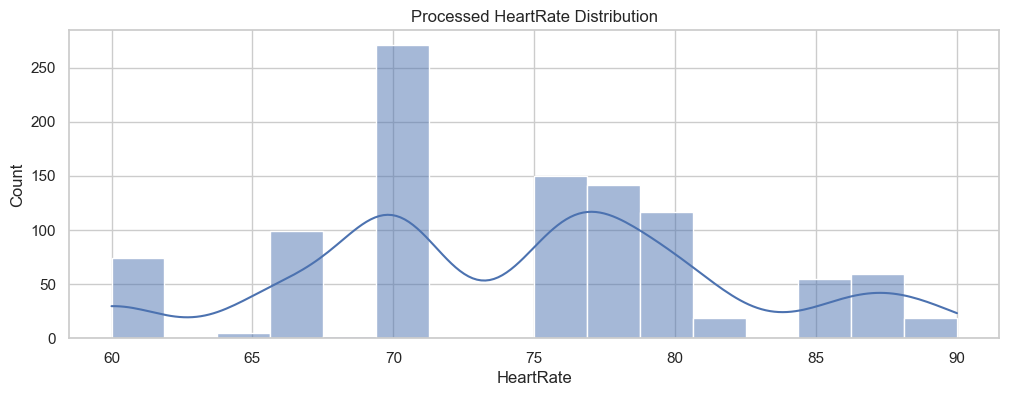

In [26]:
#Removing rows where HeartRate == 7
data_proc = data.drop(data.index[data.HeartRate == 7])

plt.figure(figsize=(12, 4))
#plotting histogram for processed HeartRate
sns.histplot(data=data_proc, x="HeartRate", kde=True)
plt.title("Processed HeartRate Distribution")
plt.show()

In [27]:
#droppping the HeartRate column
data=data.drop(["HeartRate"],axis=1)

In [32]:
from sklearn.model_selection import train_test_split
#splitting data set into X and y
X = data.drop('RiskLevel',axis=1)
y = data['RiskLevel']
X
y
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
#importing package required for RF algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#create rfclassifier with random seed
rf = RandomForestClassifier(random_state=100)
#train rfclassifier on training data
rf.fit(X_train, y_train)
#make predictions on test data
y_pred= rf.predict(X_test)
#calculate and print accuray of training and testing data
print("train accuracy:",rf.score(X_train,y_train))
print("test accuracy:",rf.score(X_test,y_test))

#calculate accuracy score and convert to %
accuracy = accuracy_score(y_test, y_pred)*100
#print accuracy with decimal place
print(f"Accuracy: {accuracy:.2f}")
#generate classification report for test data
report=classification_report(y_test, rf.predict(X_test))
print("Classification Report:")
#split report into lines and print each line
lines = report.split('\n')
for line in lines:
    print(line)
from sklearn.model_selection import cross_val_score

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=100) 

# Perform k-fold cross-validation 
k = 5  
scores = cross_val_score(rf_classifier, X, y, cv=k)  

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
mean_score = scores.mean()
std_score = scores.std()
print(f"Mean Score: {mean_score:.2f}")
print(f"Standard Deviation: {std_score:.2f}")

train accuracy: 0.9407616361071932
test accuracy: 0.8098360655737705
Accuracy: 80.98
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        76
           1       0.84      0.78      0.81       117
           2       0.76      0.78      0.77       112

    accuracy                           0.81       305
   macro avg       0.81      0.82      0.82       305
weighted avg       0.81      0.81      0.81       305

Cross-Validation Scores: [0.90640394 0.72906404 0.81280788 0.75862069 0.87623762]
Mean Score: 0.82
Standard Deviation: 0.07


In [33]:
X

,Age,SystolicBP,DiastolicBP,BS,BodyTemp
0,25,130,80,15.0,98.0
1,35,140,90,13.0,98.0
2,29,90,70,8.0,100.0
3,30,140,85,7.0,98.0
4,35,120,60,6.1,98.0
...,...,...,...,...,...
1009,22,120,60,15.0,98.0
1010,55,120,90,18.0,98.0
1011,35,85,60,19.0,98.0
1012,43,120,90,18.0,98.0


In [34]:
y

0       0
1       0
2       0
3       0
4       1
       ..
1009    0
1010    0
1011    0
1012    0
1013    2
Name: RiskLevel, Length: 1014, dtype: int64

In [35]:
#importing packages required for SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
#create SVM classifier with parameters
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
#train svm classifier
svm.fit(X_train, y_train)
#calculate and print accuracy of testing and training data
print("train accuracy:",svm.score(X_train,y_train))
print("test accuracy:",svm.score(X_test,y_test))
#make predictions on test data
y_pred = svm.predict(X_test)
print(y_pred)

#create cm to evaluate models performance 
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")
#generate classification report for testdata
report=classification_report(y_test, svm.predict(X_test))
print("Classification Report:")
#split  report 
lines = report.split('\n')
for line in lines:
    print(line)

train accuracy: 0.840620592383639
test accuracy: 0.7278688524590164
[2 0 0 1 2 2 2 2 2 0 0 1 1 0 2 2 0 1 1 2 2 2 2 0 1 2 0 2 1 1 2 0 1 1 1 0 0
 2 1 0 2 2 0 0 1 2 0 2 1 1 1 1 1 2 2 2 0 1 1 1 1 2 2 2 2 0 2 0 2 2 0 0 1 2
 1 0 1 2 0 1 1 1 1 1 2 1 1 2 0 2 2 0 1 0 2 1 1 1 0 2 1 0 1 1 1 2 1 1 1 2 2
 2 1 0 2 1 1 0 1 0 2 1 1 2 0 0 2 1 2 1 1 1 2 2 1 1 0 2 1 2 0 2 0 0 1 1 0 2
 1 2 1 1 2 2 0 2 1 2 1 1 1 1 1 1 1 2 2 2 1 1 0 1 2 2 1 0 2 1 1 1 0 2 1 1 0
 1 0 1 1 2 2 1 2 2 1 0 2 0 1 1 2 2 0 0 2 1 2 0 2 2 0 2 1 1 1 0 2 0 1 1 0 0
 2 2 1 2 2 1 0 1 1 1 2 1 2 2 1 1 2 0 0 1 1 1 2 0 1 1 1 1 0 1 2 1 0 1 1 0 0
 1 1 2 1 1 2 0 2 1 0 2 1 0 1 2 0 1 1 1 1 1 1 0 1 0 2 1 0 1 2 2 1 2 1 1 1 0
 0 1 2 1 0 0 2 0 1]
CM: [[61  6  9]
 [ 4 92 21]
 [ 8 35 69]]
Accuracy: 72.79%
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        76
           1       0.69      0.79      0.74       117
           2       0.70      0.62      0.65       112

    accuracy 

In [36]:
#importing package for decision tree
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(X_train, y_train)

#print accuracy for training and test
print("Train accuracy:",decision_tree.score(X_train,y_train))
print("Test accuracy:",decision_tree.score(X_test,y_test))

y_pred = decision_tree.predict(X_test)
print(y_pred)
#generate cm for models evaluation
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, decision_tree.predict(X_test)))

Train accuracy: 0.9407616361071932
Test accuracy: 0.780327868852459
[2 0 0 1 1 2 2 2 2 1 0 2 1 0 2 2 0 1 1 2 2 2 2 0 0 2 0 2 2 1 2 0 1 1 1 0 0
 2 1 0 0 1 0 0 1 2 0 2 1 1 2 1 1 2 2 2 0 1 1 2 1 2 2 2 1 0 2 0 2 0 0 0 2 2
 2 0 0 2 0 1 1 2 1 1 2 1 1 2 0 2 2 0 1 0 2 1 2 1 0 2 1 0 1 1 2 2 1 2 1 2 2
 2 1 0 2 1 1 0 2 0 2 1 1 2 0 0 2 1 2 2 1 1 2 2 1 1 0 2 1 2 0 2 0 0 1 1 0 1
 1 2 1 1 1 2 0 2 1 2 1 0 1 1 1 2 1 2 2 0 1 1 0 1 2 1 2 0 2 2 1 1 0 2 1 2 0
 1 0 1 0 1 2 2 2 2 1 2 2 0 1 2 2 2 0 0 2 2 2 0 2 2 0 2 1 1 2 0 2 0 1 1 0 0
 2 2 2 2 2 1 0 2 1 2 2 1 2 2 1 1 2 0 1 1 1 1 2 0 1 1 1 1 0 0 0 2 0 1 1 0 0
 0 2 2 2 2 2 0 2 2 0 1 0 0 1 2 0 0 1 1 0 1 1 1 1 0 0 2 0 1 2 2 0 2 1 1 1 0
 0 1 2 1 0 0 2 0 2]
CM: [[68  1  7]
 [ 7 85 25]
 [ 9 18 85]]
Accuracy: 78.0327868852459 %
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        76
           1       0.82      0.73      0.77       117
           2       0.73      0.76      0.74       112

    accuracy            

In [37]:
#importing package for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
# Create a KNN classifier with a specified number of neighbors (k)
knn = KNeighborsClassifier(n_neighbors=3)  # You can change the number of neighbors as needed

# Fit the KNN classifier to your training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate and print the accuracy for the training data
train_accuracy = accuracy_score(y_train, knn.predict(X_train)) * 100
print(f"Training Accuracy: {train_accuracy:.2f}")

# Calculate and print the accuracy for the test data
test_accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Generate and print a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
lines = report.split('\n')
for line in lines:
    print(line)

Training Accuracy: 89.00
Testing Accuracy: 71.48
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        76
           1       0.72      0.70      0.71       117
           2       0.65      0.69      0.67       112

    accuracy                           0.71       305
   macro avg       0.73      0.72      0.72       305
weighted avg       0.72      0.71      0.72       305



In [38]:
#importing package required for RF algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#create rfclassifier with random seed
rf = RandomForestClassifier(random_state=100)
#train rfclassifier on training data
rf.fit(X_train, y_train)
#make predictions on test data
y_pred= rf.predict(X_test)
#calculate and print accuray of training and testing data
print("train accuracy:",rf.score(X_train,y_train))
print("test accuracy:",rf.score(X_test,y_test))

#calculate accuracy score and convert to %
accuracy = accuracy_score(y_test, y_pred)*100
#print accuracy with decimal place
print(f"Accuracy: {accuracy:.2f}")
#generate classification report for test data
report=classification_report(y_test, rf.predict(X_test))
print("Classification Report:")
#split report into lines and print each line
lines = report.split('\n')
for line in lines:
    print(line)
from sklearn.model_selection import cross_val_score

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=100) 

# Perform k-fold cross-validation 
k = 5  
scores = cross_val_score(rf_classifier, X, y, cv=k)  

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
mean_score = scores.mean()
std_score = scores.std()
print(f"Mean Score: {mean_score:.2f}")
print(f"Standard Deviation: {std_score:.2f}")

train accuracy: 0.9407616361071932
test accuracy: 0.8098360655737705
Accuracy: 80.98
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        76
           1       0.84      0.78      0.81       117
           2       0.76      0.78      0.77       112

    accuracy                           0.81       305
   macro avg       0.81      0.82      0.82       305
weighted avg       0.81      0.81      0.81       305

Cross-Validation Scores: [0.90640394 0.72906404 0.81280788 0.75862069 0.87623762]
Mean Score: 0.82
Standard Deviation: 0.07


In [39]:
%pip install joblib

In [40]:
import joblib
#Saved trained model to file
joblib.dump(rf,'MHRF')

['MHRF']

In [41]:
# Load the model from the file
rf = joblib.load('MHRF')

In [42]:
%pip install flask

  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Note: you may need to restart the kernel to use updated packages.
